In [9]:
Dictionary={
    'name':'Anamul Hasan',
      'Id':'170104006'
}

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Implement Linear Regression without using Scikit-learn.

In [23]:
datasets

<module 'sklearn.datasets' from '/usr/local/lib/python3.7/dist-packages/sklearn/datasets/__init__.py'>

In [11]:
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [24]:
X

array([[ 0.11659184, -1.08506791,  0.18110925, ...,  0.8810647 ,
         1.08206357, -1.6340592 ],
       [-1.05580662,  0.52801849,  0.57551382, ..., -1.5661541 ,
         0.17466855, -0.59050201],
       [-3.11287183,  2.21807758, -0.41080947, ...,  0.16128931,
         0.52729999,  0.66265687],
       ...,
       [-0.8529278 , -1.33966674, -0.52392305, ...,  2.07121152,
        -0.11404135, -0.45927245],
       [ 0.37670757, -1.10977439,  1.10494707, ...,  1.02422229,
         1.28224692, -0.27832071],
       [ 0.55831298, -1.24577678,  2.41718375, ..., -0.0125736 ,
        -0.38187154,  2.08136365]])

In [25]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,

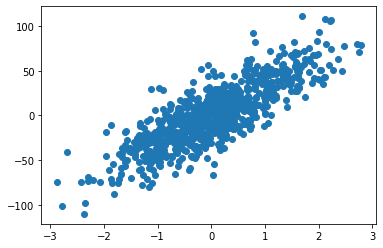

In [12]:
plt.scatter(X_train,y_train)

In [13]:
class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias    #y^=wx+b
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) 
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias  # y=w *  x  +  b
        return y_approximated

In [14]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
    
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 473.7927785182614


# Implement Logistic Regression from scratch without using Scikit-learn. Run it against a dataset

of choice (any dataset with over 1000 samples). Run the same algorithm with the help of Scikit-
learn. Compare your implementation with Scikit-learn’s one.

# Logistic Regression from scratch

In [15]:
X, y = datasets.make_classification(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [16]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            
            linear_model = np.dot(X, self.weights) + self.bias  #y^=wx+b
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)                            #  0 ->1     0 or 1
 
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [17]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.93


# Logistic Regression Using Scikit-learn

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [20]:
predictions2 = lf.predict(X_test)


In [21]:
print("LR classification accuracy:", accuracy(y_test, predictions2))

LR classification accuracy: 0.91


 5 Make a dataset by yourself which should have enough samples and attributes and write
documentation of it. Do classification or regression on it. If you want to do a classification task,
implement at least five models. If you want to do regression, similarly at least five models need
to be implemented. For each model get at least three performance metric scores.
Implementation of cross validation is a must.

In [22]:
data=pd.read_csv('diabetes.csv')

FileNotFoundError: ignored

In [ ]:
data.head(10)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error    
from sklearn.metrics import r2_score   


In [ ]:
X=data.iloc[ : , :-1]

In [ ]:
X.columns

In [ ]:
y=data['Outcome']

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
# model = LogisticRegression()
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
for train_index, test_index in kf.split(X):
     
    x_train, x_test = X.lioc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lf = LogisticRegression()
    lf.fit(x_train,y_train)
    prediction = lf.predict(x_test)
    
    print('mse',mean_squared_error(y_test, prediction, squared=True))
    
    print('rmse',mean_squared_error(y_test, prediction, squared=False))
    print('r^2',r2_score(y_test, prediction))
    print('\n')

    
    